In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
confirmed_data = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
recovered_data = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv")
deaths_data = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv")

In [4]:
confirmed = confirmed_data.loc[confirmed_data["Country/Region"] == "US"]
confirmed = confirmed.drop(["Province/State","Country/Region","Lat","Long","3/20/20"],axis=1)
confirmed.head()

recovered = recovered_data.loc[recovered_data["Country/Region"] == "US"]
recovered = recovered.drop(["Province/State","Country/Region","Lat","Long","3/20/20"], axis=1)
recovered.head()

deaths = deaths_data.loc[deaths_data["Country/Region"] == "US"]
deaths = deaths.drop(["Province/State","Country/Region","Lat","Long","3/20/20"], axis=1)
deaths.head()
#michigan = test.loc[test["Province/State"] == "Michigan"]
#dates = np.array([])
#confirmed_m = np.array([])
#for col in michigan.columns[4:-1]:
#    dates = np.append(dates,col)
#    confirmed_m = np.append(confirmed_m,michigan[col])
#plt.plot(dates,confirmed_m)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
98,0,0,0,0,0,0,0,0,0,0,...,23,29,31,37,37,40,48,55,55,74
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,3,10,13,16,34
100,0,0,0,0,0,0,0,0,0,0,...,2,3,4,4,5,6,7,12,13,18
101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


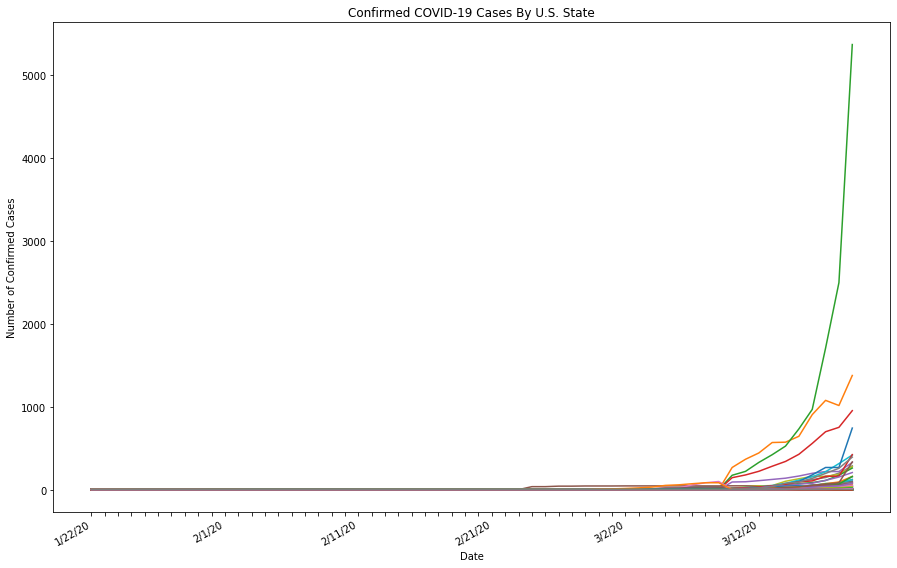

<Figure size 1080x720 with 0 Axes>

In [9]:
import matplotlib.dates as mdates

dates = np.array([])
for col in confirmed.columns:
    dates = np.append(dates,col)

confirmed_matrix = np.empty([1,58])
total_confirmed_matrix = np.empty([1,58])
for index, row in confirmed.iterrows():
    state_confirmed = np.array([])
    for val in confirmed.loc[index]:
        state_confirmed = np.append(state_confirmed,val)
    confirmed_matrix = np.vstack([confirmed_matrix,state_confirmed])

fig, ax = plt.subplots(figsize=(15,10))
plt.locator_params(axis='x', nbins=6)
plt.figure(figsize=(15,10))
for row in confirmed_matrix:
    total_confirmed_matrix += row
    ax.plot(dates,row)
    
every_nth = 10
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.set_title("Confirmed COVID-19 Cases By U.S. State")
ax.set_xlabel("Date")
ax.set_ylabel("Number of Confirmed Cases")
fig.savefig("confirmed_state.png")

In [10]:
print(total_confirmed_matrix[0])

[1.0000e+00 1.0000e+00 2.0000e+00 2.0000e+00 5.0000e+00 5.0000e+00
 5.0000e+00 5.0000e+00 5.0000e+00 7.0000e+00 8.0000e+00 8.0000e+00
 1.1000e+01 1.1000e+01 1.1000e+01 1.1000e+01 1.1000e+01 1.1000e+01
 1.1000e+01 1.1000e+01 1.2000e+01 1.2000e+01 1.3000e+01 1.3000e+01
 1.3000e+01 1.3000e+01 1.3000e+01 1.3000e+01 1.3000e+01 1.3000e+01
 1.5000e+01 1.5000e+01 1.5000e+01 5.1000e+01 5.1000e+01 5.7000e+01
 5.8000e+01 6.0000e+01 6.8000e+01 7.4000e+01 9.8000e+01 1.1800e+02
 1.4900e+02 2.1700e+02 2.6200e+02 4.0200e+02 5.1800e+02 5.8300e+02
 9.5900e+02 1.2810e+03 1.6630e+03 2.1790e+03 2.7270e+03 3.4990e+03
 4.6320e+03 6.4210e+03 7.7830e+03 1.3677e+04]


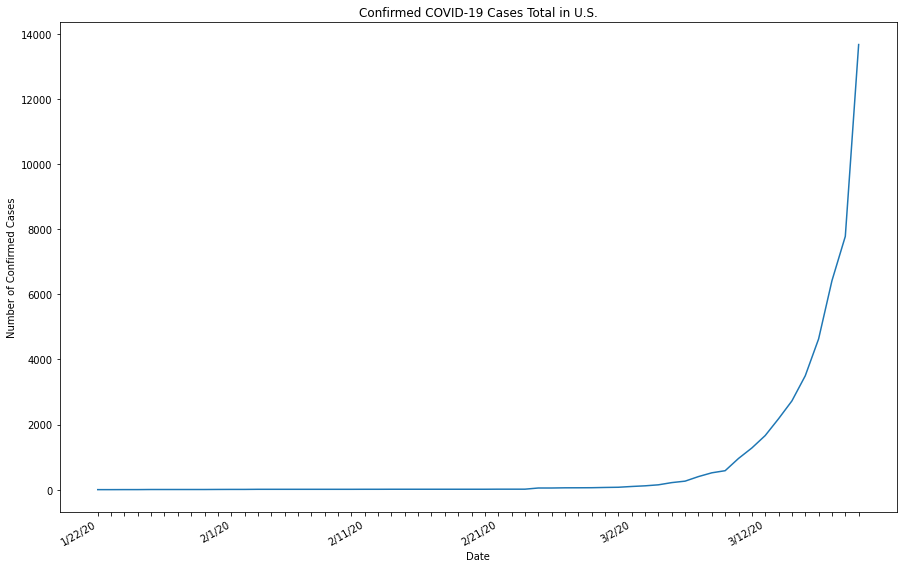

<Figure size 1080x720 with 0 Axes>

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
plt.locator_params(axis='x', nbins=6)
plt.figure(figsize=(15,10))
ax.plot(dates,total_confirmed_matrix[0])
    
every_nth = 10
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.set_title("Confirmed COVID-19 Cases Total in U.S.")
ax.set_xlabel("Date")
ax.set_ylabel("Number of Confirmed Cases")
fig.savefig("confirmed_total.png")